In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())

/data/Documents/DataScience/Courses/Dissertation/src/evaluation


## CVC5 Results

In [2]:
df = pd.read_csv('../benchmark/sygus_solver_cvc5_results.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run_id        2910 non-null   object 
 1   run_datetime  2910 non-null   object 
 2   solver        2910 non-null   object 
 3   config        2910 non-null   object 
 4   file          2910 non-null   object 
 5   return_code   2910 non-null   int64  
 6   time          2910 non-null   float64
 7   stdout        2596 non-null   object 
 8   stderr        314 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 204.7+ KB
None
                                 run_id                run_datetime solver  \
0  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b  2024-08-05T14:32:03.739996   cvc5   
1  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b  2024-08-05T14:32:03.739996   cvc5   
2  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b  2024-08-05T14:32:03.739996   cvc5   
3  80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b 

In [3]:
df['config'] = (df['config']
                .str.replace('--tlimit=30000', '')
                .str.replace('--sygus-enum=', '')
                .str.replace('--sygus-si=', '_single_invocation_')
                .str.replace('--', '_')
                .str.replace('-', '_')
                .str.replace('=', '_')
                .str.replace(' ', '')
                )
df['file'] = df['file'].str.replace('problems/sygus_comp_2019_clia_track/', '').str.replace('.sl','').str.strip()
df.head(20)

,run_id,run_datetime,solver,config,file,return_code,time,stdout,stderr
0,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart,absolute,0,0.024061,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
1,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,random,absolute,0,0.012046,(\n(define-fun abs ((x Int)) Int x)\n)\n,NaN
2,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,fast,absolute,0,0.015042,(\n(define-fun abs ((x Int)) Int x)\n)\n,NaN
3,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,var_agnostic,absolute,0,0.012479,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
4,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart_single_invocation_none,absolute,0,0.019130,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
5,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart_single_invocation_use,absolute,0,0.008297,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
6,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart_single_invocation_all,absolute,0,0.011925,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
7,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart_sygus_abort_size_10,absolute,0,0.011131,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
8,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart_sygus_abort_size_20,absolute,0,0.011003,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN
9,80a4067e-b8b2-46a4-a1d0-0ae31aaf0a7b,2024-08-05T14:32:03.739996,cvc5,smart_sygus_grammar_cons_simple,absolute,0,0.011591,(\n(define-fun abs ((x Int)) Int 1)\n)\n,NaN


In [4]:
config_counts = df['config'].value_counts()
print("Configuration counts:")
print(config_counts)

Configuration counts:
config
smart                                194
random                               194
fast                                 194
var_agnostic                         194
smart_single_invocation_none         194
smart_single_invocation_use          194
smart_single_invocation_all          194
smart_sygus_abort_size_10            194
smart_sygus_abort_size_20            194
smart_sygus_grammar_cons_simple      194
smart_sygus_grammar_cons_any_term    194
smart_sygus_fair_direct              194
smart_sygus_fair_dt_size_bound       194
smart_sygus_fair_none                194
smart_sygus_repair_const             194
Name: count, dtype: int64


In [5]:
avg_time_by_config = df.groupby('config')['time'].mean().reset_index()
avg_time_by_problem = df.groupby('file')['time'].mean().reset_index()

print("Average Execution Time by Configuration:")
print(avg_time_by_config)
print("\nAverage Execution Time by Problem:")
print(avg_time_by_problem)


Average Execution Time by Configuration:
                               config       time
0                                fast   1.249223
1                              random   1.411360
2                               smart   1.234327
3         smart_single_invocation_all   1.230177
4        smart_single_invocation_none  21.521946
5         smart_single_invocation_use   1.232530
6           smart_sygus_abort_size_10   1.229578
7           smart_sygus_abort_size_20   1.230996
8             smart_sygus_fair_direct   1.264603
9      smart_sygus_fair_dt_size_bound   0.547726
10              smart_sygus_fair_none   0.544095
11  smart_sygus_grammar_cons_any_term   2.750932
12    smart_sygus_grammar_cons_simple   1.230172
13           smart_sygus_repair_const   1.229541
14                       var_agnostic   1.513923

Average Execution Time by Problem:
                 file       time
0            absolute   0.013822
1       arraysearch16   2.115190
2       arraysearch17   2.130297
3      

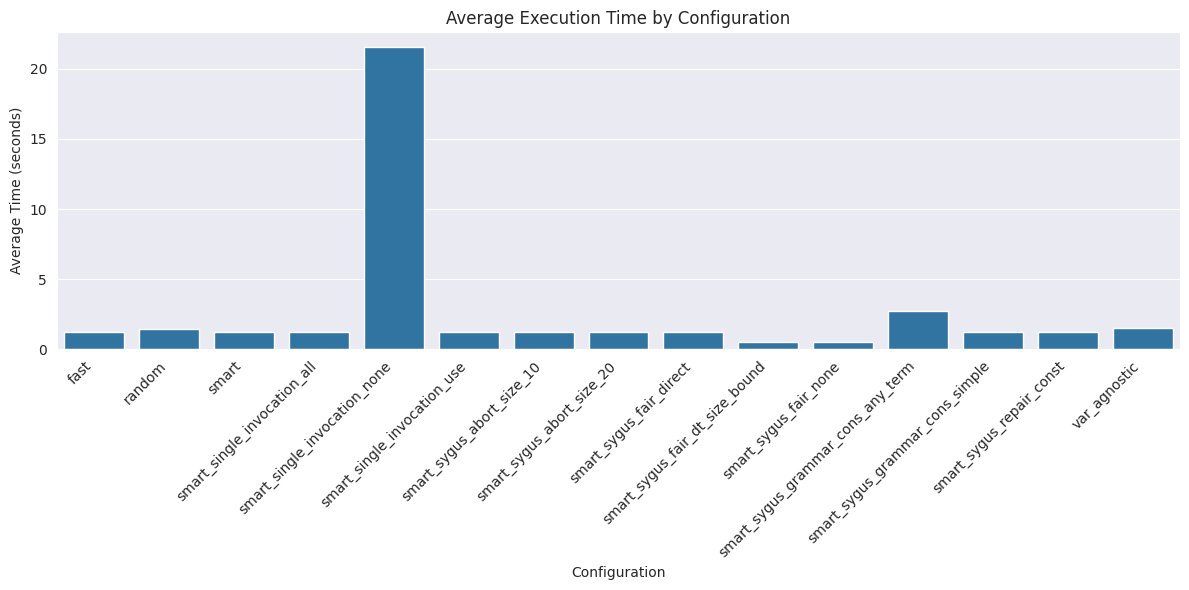

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='time', data=avg_time_by_config)
plt.title('Average Execution Time by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

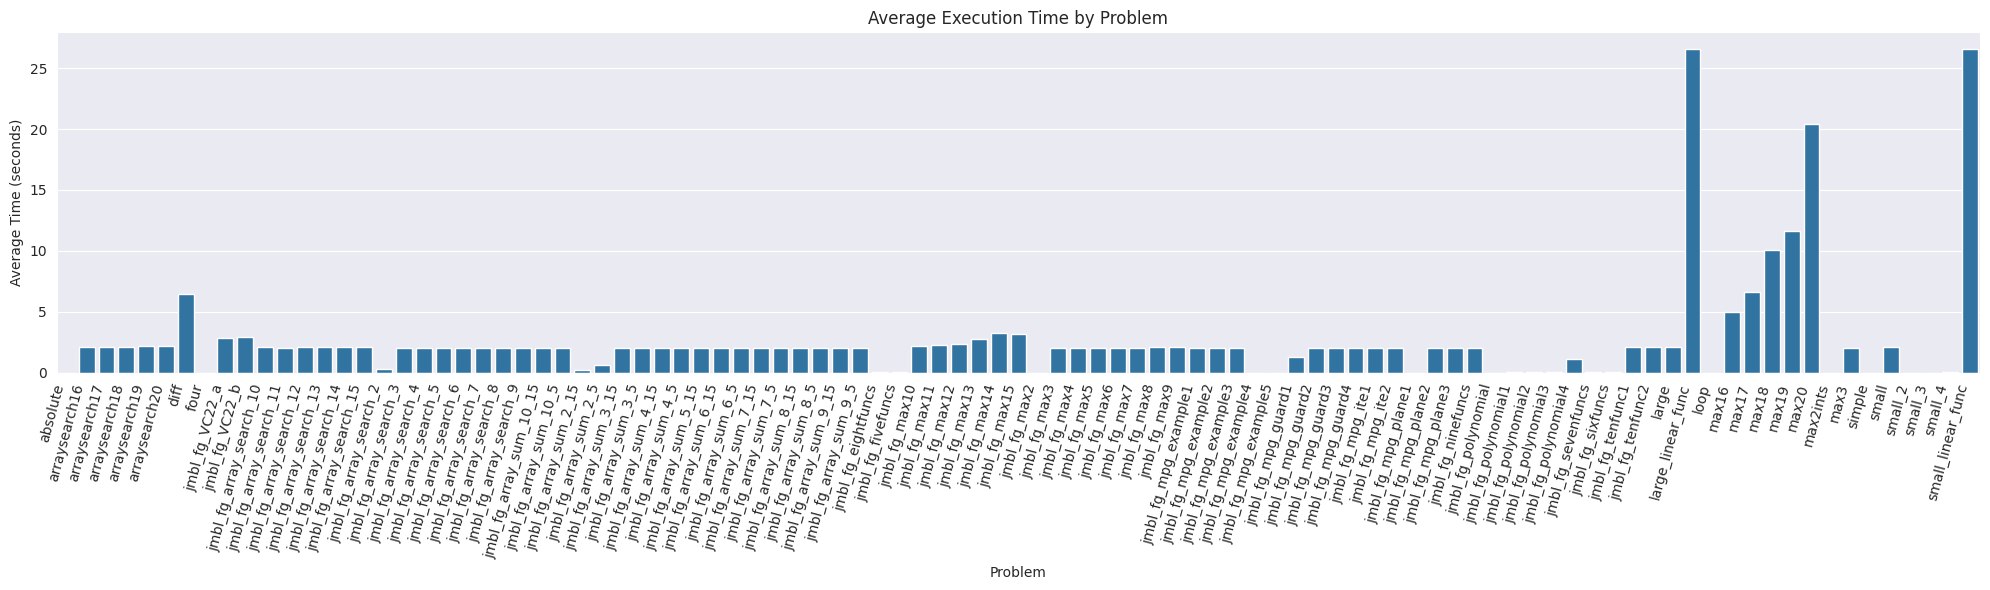

In [7]:
plt.figure(figsize=(20, 6))
sns.barplot(x='file', y='time', data=avg_time_by_problem)
plt.title('Average Execution Time by Problem')
plt.xlabel('Problem')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

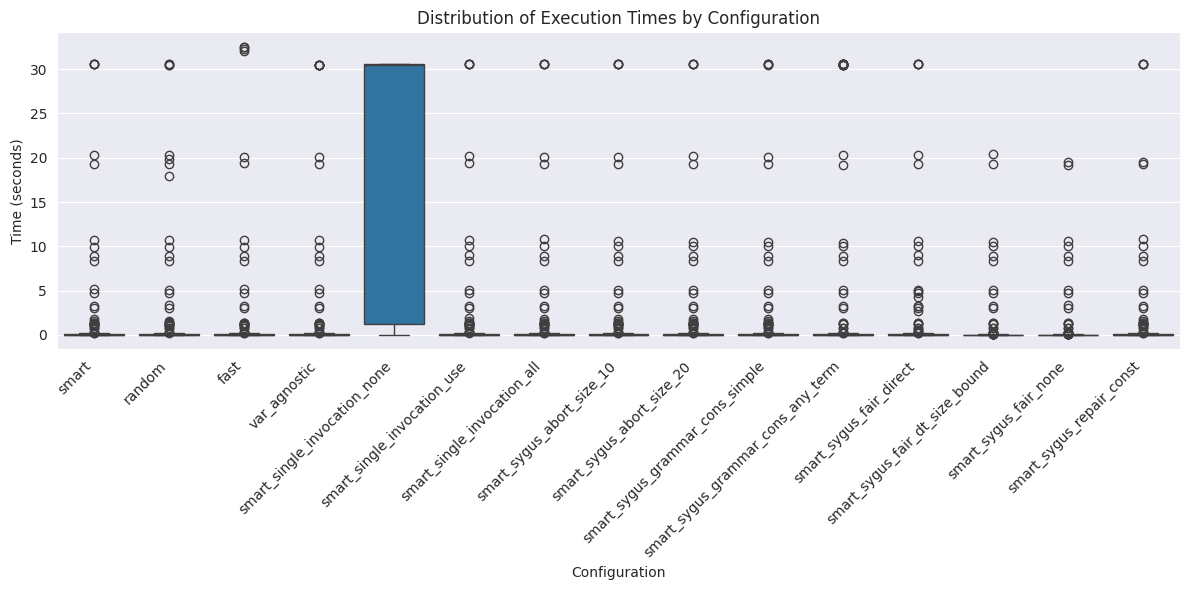

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df)
plt.title('Distribution of Execution Times by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

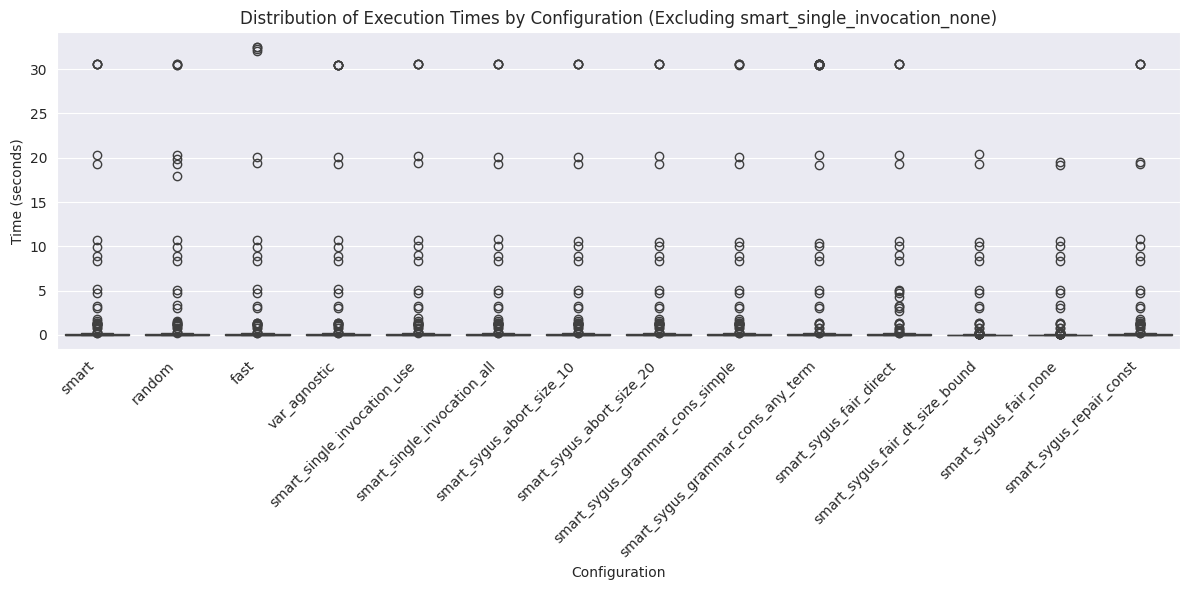

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df[df['config'] != 'smart_single_invocation_none'])
plt.title('Distribution of Execution Times by Configuration (Excluding smart_single_invocation_none)')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

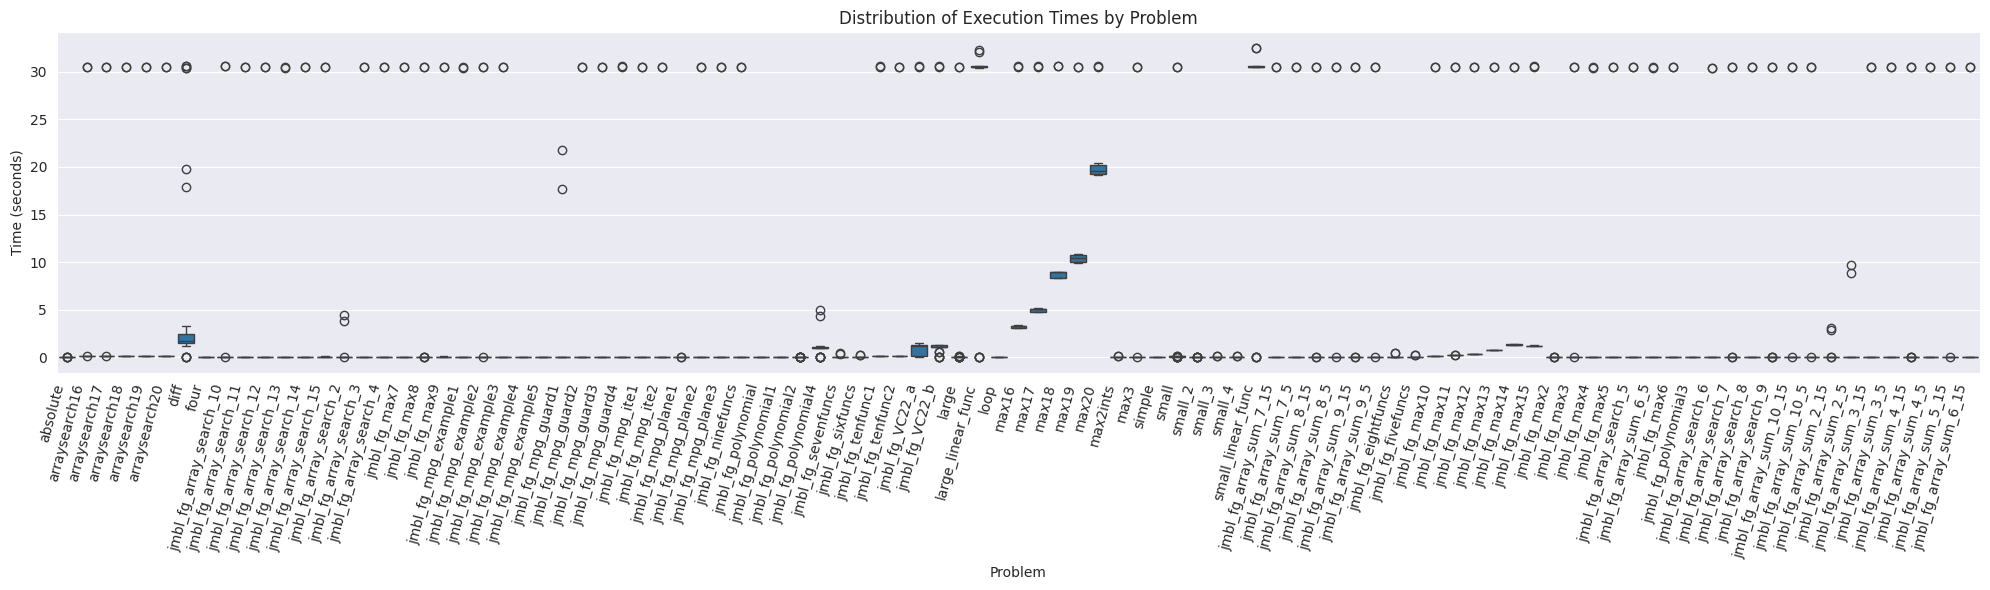

In [10]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='file', y='time', data=df)
plt.title('Distribution of Execution Times by Problem')
plt.xlabel('Problem')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


Return code counts:
return_code
 0    2596
-6     194
 1     120
Name: count, dtype: int64


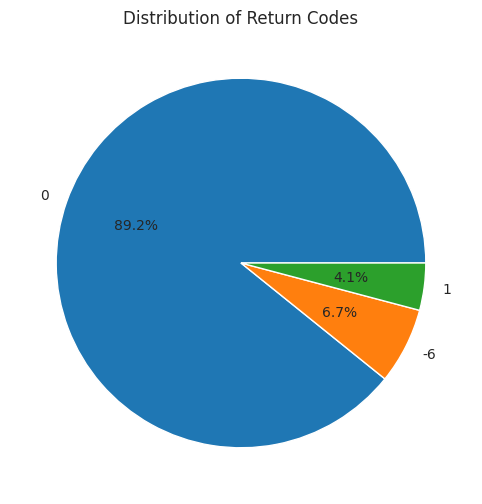

In [11]:
return_code_counts = df['return_code'].value_counts()
print("\nReturn code counts:")
print(return_code_counts)

plt.figure(figsize=(8, 6))
return_code_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Return Codes')
plt.ylabel('')
plt.show()

## Partial PySynthLab Scoring Analysis

In [12]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# 
# def analyze_results(results):
#     df = pd.DataFrame(results)
# 
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df[df['success']]['metrics'].apply(lambda x: x['time_spent']),
#                 df[df['success']]['metrics'].apply(lambda x: x['solution_complexity']),
#                 c=df[df['success']]['metrics'].apply(lambda x: x['solution_height']),
#                 cmap='viridis')
#     plt.colorbar(label='Solution Height')
#     plt.xlabel('Time Spent (s)')
#     plt.ylabel('Solution Complexity')
#     plt.title('Time Spent vs. Solution Complexity')
#     plt.show()
# 
# 
#     plt.figure(figsize=(10, 6))
#     for i, result in enumerate(results):
#         if result['success']:
#             plt.plot(result['metrics']['partial_satisfaction_scores'], label=f"Config {i}")
#     plt.xlabel('Iterations')
#     plt.ylabel('Partial Satisfaction Score')
#     plt.title('Partial Satisfaction Score Progression')
#     plt.legend()
#     plt.show()
# 
# 
#     print(df.groupby('config').agg({
#         'success': 'mean',
#         'metrics': lambda x: pd.Series({
#             'avg_time': np.mean([m['time_spent'] for m in x]),
#             'avg_iterations': np.mean([m['iterations'] for m in x]),
#             'avg_candidates': np.mean([m['candidates_generated'] for m in x]),
#         })
#     }))
